<a href="https://colab.research.google.com/github/Aryamahatme/Data_sci_repo/blob/main/Detailed_EDA_of_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np

In [79]:
data=pd.read_csv("/content/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Checking for null values. Column 'Age' and 'cabin' have null values to be treated.

In [82]:
# To find the percentage of null values in both the column so as to decide whether or not to omit them.
c=177/891*100
print('the percentage of data for column AGE missing is',c)

the percentage of data for column AGE missing is 19.865319865319865


Approximately 20% of data is missing so we can perform imputation of some kind on this column to make it suitable for modelling.

In [83]:
c=687/891*100
print('the percentage of data for column CABIN missing is',c)

the percentage of data for column CABIN missing is 77.10437710437711


More than 75% of data is missing , so we'll probably drop this column later or change into 'cabin known; 0 or 1.

In [84]:
##DEALING WITH THE OUTLIERS
####Age
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [85]:
data['Age'].isnull().sum()

0


We replaced the null values in the 'AGE' column with the mean, which is easier to do but is not completely appropriate in this situation. Rather we could use the data from the 'NAME' column which corresponds to the missing ages. For example we have Mrs, Ms, Mr written in the Name column.

def extract(x):
    temp = x.split(" ")
    if "Mr." in temp:
        return "Mr"
    elif "Mrs." in temp:
        return "Mrs"
    elif "Miss." in temp:
        return "Miss"
    elif "Master." in temp:
        return "Master"
    elif "Dr." in temp:
        return "Dr"
    else:
        return None

 data['Category']= data['Name'].apply(extract)
data['Category'].unique()
array(['Mr', 'Mrs', 'Miss', 'Master', None, 'Dr'], dtype=object)       

print("Mr." , np.mean(train[train["Category"] == "Mr"]["Age"]))
print("Mrs." , np.mean(train[train["Category"] == "Mrs"]["Age"]))
print("Miss." , np.mean(train[train["Category"] == "Miss"]["Age"]))
print("Master." , np.mean(train[train["Category"] == "Master"]["Age"]))
print("Dr." , np.mean(train[train["Category"] == "Dr"]["Age"]))

This is the more appropriate approach to fill the 177 'NaN' values in the 'AGE' column.

In [86]:
data.drop(["PassengerId",'Ticket','Cabin'],axis = 1,inplace = True)

In [87]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [88]:
data.drop(['Name'],axis=1,inplace= True)

From common sense, columns such as PassengerId, Name and Ticket number shouldn't be related to the survival probability. So these columns can be droped.

In [89]:
####FOR EMBARKED
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [90]:
sa=data[data['Embarked'].isna()]
sa

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [91]:
data=data.drop(61)

In [92]:
data=data.drop(829)

In [93]:
data['Embarked'].isna().sum()

0

We dropped the rows with NaN in the embarked column.

In [94]:
data.isnull().any()

,0
Survived,False
Pclass,False
Sex,False
Age,False
SibSp,False
Parch,False
Fare,False
Embarked,False


NO NULL VALUES


<Axes: xlabel='Survived', ylabel='count'>

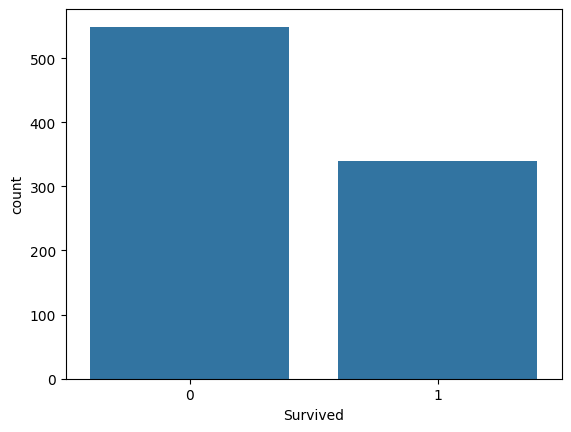

In [95]:
import seaborn as sns
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

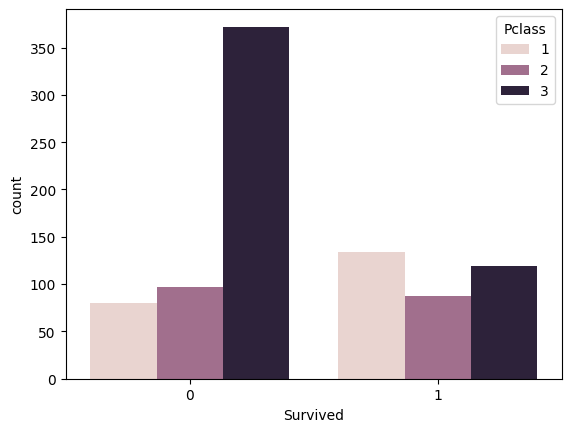

In [96]:
sns.countplot(x='Survived',hue="Pclass",data=data)

In [97]:
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

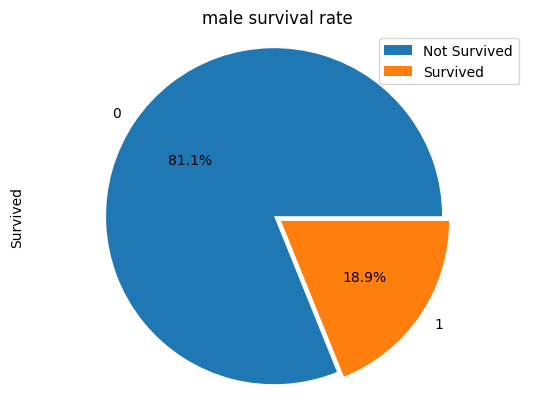

In [98]:
import matplotlib.pyplot as plt
data[data['Sex']=='male'].Survived.groupby(data.Survived).count().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.05])
plt.axis('equal')
plt.legend(['Not Survived','Survived'])
plt.title('male survival rate')
plt.show()

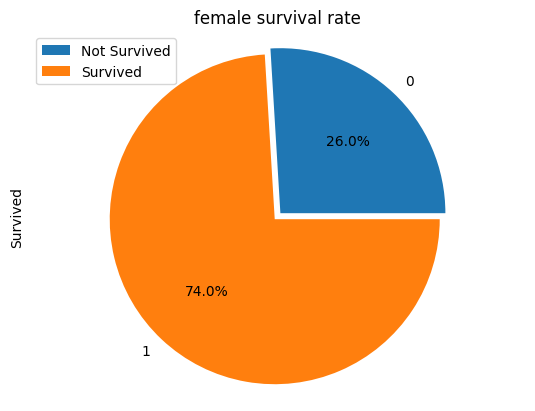

In [99]:
data[data['Sex']=='female'].Survived.groupby(data.Survived).count().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.05])
plt.axis('equal')
plt.legend(['Not Survived','Survived'])
plt.title('female survival rate')
plt.show()

The above 2 plots says the females were given more priority than male in the survival process. That too there is a significant difference between the two.

So now if we choose just Sex as the only feature and say all females survived and all men perished, then we would end up with an accuracy of 78.67%

In [100]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Pclass', ylabel='Survived'>

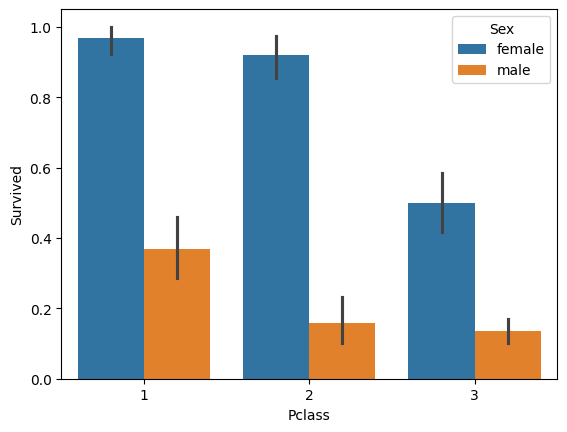

In [101]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data = data)